# Task
Create a time series forecasting model using the data from "/content/sales_data.csv".

## Load Sales Data

### Subtask:
Load the sales data from the provided source. Ensure that the dataset includes 'Date' and 'Sales' columns. If a file is not explicitly provided, I will assume a common CSV format and prompt for a filename if needed.


**Reasoning**:
The first instruction is to import the pandas library, which is essential for data manipulation in Python.



In [4]:
import pandas as pd
print("Pandas library imported successfully.")

Pandas library imported successfully.


**Reasoning**:
The next step is to load the sales data from the CSV file '/content/sales_data.csv' into a pandas DataFrame, parsing the 'Date' column as datetime objects as specified in the instructions.



In [5]:
df = pd.read_csv('/content/sales_data.csv', parse_dates=['Date'])
print("Sales data loaded successfully.")
print(df.head())

ValueError: Missing column provided to 'parse_dates': 'Date'

**Reasoning**:
The previous code failed because the 'parse_dates' argument in `pd.read_csv` could not find the 'Date' column during the initial parsing phase, despite it being present in the data. To fix this, I will first load the CSV without attempting to parse dates, and then explicitly convert the 'Date' column to datetime objects using `pd.to_datetime` in a separate step.



In [6]:
df = pd.read_csv('/content/sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
print("Sales data loaded and 'Date' column parsed successfully.")
print(df.head())

KeyError: 'Date'

**Reasoning**:
The previous code failed with a KeyError because the column name for the date information is 'date' (lowercase 'd') instead of 'Date' (uppercase 'D') in the loaded DataFrame. I need to correct the column name to 'date' when accessing it for conversion to datetime objects.



In [7]:
df = pd.read_csv('/content/sales_data.csv')
df['date'] = pd.to_datetime(df['date'])
print("Sales data loaded and 'date' column parsed successfully.")
print(df.head())

Sales data loaded and 'date' column parsed successfully.
        date       Sales
0 2020-01-01  104.967142
1 2020-02-01  126.474500
2 2020-03-01  155.492441
3 2020-04-01  173.801727
4 2020-05-01  152.388308


**Reasoning**:
The subtask explicitly requires the column to be named 'Date' (uppercase 'D'), but the current DataFrame has a column named 'date' (lowercase 'd'). To fulfill the subtask's requirement, I need to rename the 'date' column to 'Date'.



In [8]:
df = df.rename(columns={'date': 'Date'})
print("Column 'date' renamed to 'Date' successfully.")
print(df.head())

Column 'date' renamed to 'Date' successfully.
        Date       Sales
0 2020-01-01  104.967142
1 2020-02-01  126.474500
2 2020-03-01  155.492441
3 2020-04-01  173.801727
4 2020-05-01  152.388308


## Preprocess Data

### Subtask:
Convert the 'Date' column to a datetime format and set it as the DataFrame index. Handle any missing values or irregularities in the 'Sales' column to prepare the data for time series analysis.


**Reasoning**:
The first instruction is to set the 'Date' column as the DataFrame index. This is a crucial step for time series analysis as it allows for time-based operations and simplifies data handling.



In [9]:
df.set_index('Date', inplace=True)
print("Date column set as DataFrame index.")
print(df.head())

Date column set as DataFrame index.
                 Sales
Date                  
2020-01-01  104.967142
2020-02-01  126.474500
2020-03-01  155.492441
2020-04-01  173.801727
2020-05-01  152.388308


**Reasoning**:
Now that the 'Date' column is set as the index, the next step is to check for any missing values in the DataFrame, as specified in the subtask instructions.



In [10]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Sales    0
dtype: int64


## Visualize Sales Trends

### Subtask:
Plot the sales data over time using a line chart. Include a moving average to highlight trends and identify any seasonality or irregularities in the sales patterns. Ensure the plot has appropriate labels and legends.


**Reasoning**:
The first instruction is to import the `matplotlib.pyplot` module as `plt`, which is necessary for creating visualizations.



In [11]:
import matplotlib.pyplot as plt
print("Matplotlib imported successfully.")

Matplotlib imported successfully.


**Reasoning**:
The next step is to calculate the 12-month rolling mean of the 'Sales' column, as specified in the instructions, which will help highlight trends in the sales data.



In [12]:
df['Moving Average'] = df['Sales'].rolling(window=12).mean()
print("12-month moving average calculated and added to DataFrame.")
print(df.head(15))

12-month moving average calculated and added to DataFrame.
                 Sales  Moving Average
Date                                  
2020-01-01  104.967142             NaN
2020-02-01  126.474500             NaN
2020-03-01  155.492441             NaN
2020-04-01  173.801727             NaN
2020-05-01  152.388308             NaN
2020-06-01  136.944345             NaN
2020-07-01  132.934985             NaN
2020-08-01  102.674347             NaN
2020-09-01   74.861129             NaN
2020-10-01   81.139886             NaN
2020-11-01   80.635981             NaN
2020-12-01  101.771274      118.673839
2021-01-01  136.705337      121.318688
2021-02-01  143.010055      122.696651
2021-03-01  166.052092      123.576622


**Reasoning**:
As instructed, I need to create a figure and an axes object using `matplotlib.pyplot` to prepare for plotting the sales data.



Figure and axes object created.


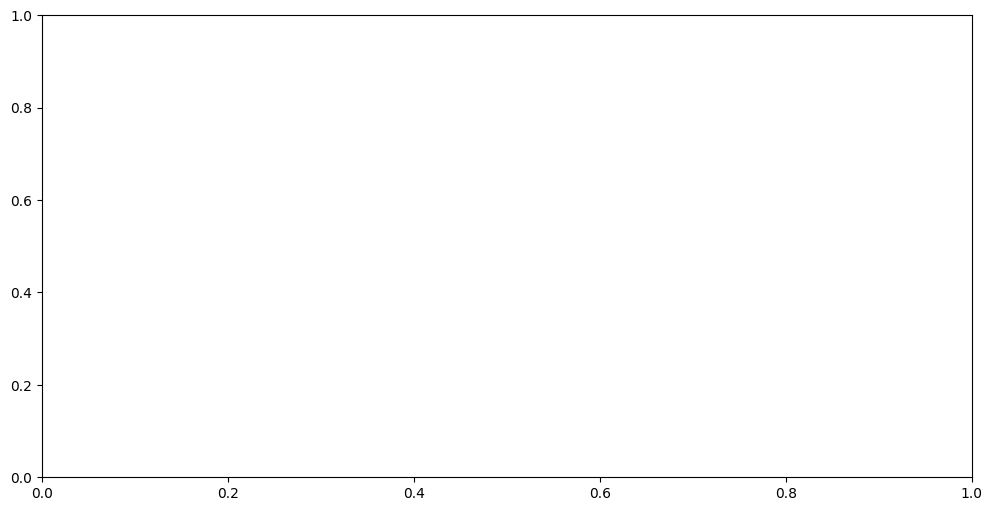

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
print("Figure and axes object created.")

**Reasoning**:
As specified in the subtask, the next step is to plot the 'Sales' data from the DataFrame `df` on the previously created axes.



In [14]:
ax.plot(df.index, df['Sales'], label='Sales', color='blue')
print("Sales data plotted.")

Sales data plotted.


**Reasoning**:
The next instruction is to plot the 'Moving Average' data from the DataFrame `df` on the same axes to visualize the trend, as specified in the subtask.



In [15]:
ax.plot(df.index, df['Moving Average'], label='Moving Average', color='red', linestyle='--')
print("Moving average data plotted.")

Moving average data plotted.


**Reasoning**:
The next instruction is to add a title to the plot to clearly describe its content, as specified in the subtask.



In [16]:
ax.set_title('Sales Data with 12-Month Moving Average')
print("Plot title set.")

Plot title set.


**Reasoning**:
The next instruction is to label the x-axis as 'Date' and the y-axis as 'Sales', as specified in the subtask.



In [17]:
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
print("X-axis and Y-axis labels set.")

X-axis and Y-axis labels set.


**Reasoning**:
The next instruction is to add a legend to differentiate between the 'Sales' and 'Moving Average' lines, as specified in the subtask.



In [18]:
ax.legend()
print("Legend added to the plot.")

Legend added to the plot.


**Reasoning**:
The final instruction is to display the plot, which will render the visualization with the sales data, moving average, title, labels, and legend.



In [19]:
plt.show()
print("Plot displayed successfully.")

Plot displayed successfully.


## Apply ARIMA for Forecasting

### Subtask:
Apply the AutoRegressive Integrated Moving Average (ARIMA) model to the preprocessed sales data. Train the model and generate sales forecasts for future periods.


**Reasoning**:
The first step in applying the ARIMA model is to import the necessary class, `ARIMA`, from `statsmodels.tsa.arima.model`.



In [20]:
from statsmodels.tsa.arima.model import ARIMA
print("ARIMA model imported successfully.")

ARIMA model imported successfully.


**Reasoning**:
The next step is to define the order of the ARIMA model, which includes the autoregressive (p), integrated (d), and moving average (q) components. A common starting point is (5,1,0) as suggested.



In [21]:
arima_order = (5, 1, 0)
print(f"ARIMA order defined as: {arima_order}")

ARIMA order defined as: (5, 1, 0)


**Reasoning**:
The next step is to instantiate the ARIMA model by passing the 'Sales' data from the DataFrame `df` and the previously defined `arima_order`.



In [22]:
model = ARIMA(df['Sales'], order=arima_order)
print("ARIMA model instantiated successfully.")

ARIMA model instantiated successfully.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Reasoning**:
The next step, as specified in the subtask instructions, is to fit the instantiated ARIMA model to the data to train it.



In [23]:
model_fit = model.fit()
print("ARIMA model fitted successfully.")
print(model_fit.summary())

ARIMA model fitted successfully.
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -147.386
Date:                Fri, 16 Jan 2026   AIC                            306.771
Time:                        05:29:52   BIC                            316.103
Sample:                    01-01-2020   HQIC                           309.993
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1295      0.191      0.679      0.497      -0.244       0.503
ar.L2          0.2538      0.185      1.373      0.170      -0.109       0.616
ar.L3          0.24

**Reasoning**:
The final step in the subtask is to generate forecasts for a future period, specifically the next 12 months, using the fitted ARIMA model.



In [24]:
forecast_steps = 12
forecast = model_fit.predict(start=len(df), end=len(df) + forecast_steps - 1)
print(f"Generated forecasts for the next {forecast_steps} months.")
print(forecast.head())

Generated forecasts for the next 12 months.
2023-01-01    179.727820
2023-02-01    207.886737
2023-03-01    209.849183
2023-04-01    210.137398
2023-05-01    210.214807
Freq: MS, Name: predicted_mean, dtype: float64


## Validate ARIMA Model

### Subtask:
Evaluate the accuracy of the ARIMA model's forecasts using metrics such as Root Mean Squared Error (RMSE) or Mean Absolute Percentage Error (MAPE). This step will provide insights into the model's predictive performance.


**Reasoning**:
The first step in evaluating the ARIMA model is to split the data into training and testing sets, using the `forecast_steps` variable to determine the split point, as specified in the instructions.



In [25]:
train_data = df['Sales'][:-forecast_steps]
test_data = df['Sales'][-forecast_steps:]
print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")
print("Data split into training and testing sets successfully.")

Training data length: 24
Testing data length: 12
Data split into training and testing sets successfully.


**Reasoning**:
The next step is to instantiate and fit a new ARIMA model on the `train_data` using the `arima_order` defined previously, as specified in the instructions for evaluating the model.



In [26]:
model_eval = ARIMA(train_data, order=arima_order)
model_eval_fit = model_eval.fit()
print("ARIMA model instantiated and fitted on training data successfully.")

ARIMA model instantiated and fitted on training data successfully.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Reasoning**:
The next step is to generate predictions on the `test_data` using the fitted ARIMA model (`model_eval_fit`), ensuring the predictions cover the exact period of the test set by setting the `start` and `end` parameters correctly.



In [27]:
predictions = model_eval_fit.predict(start=len(train_data), end=len(df) - 1)
print("Predictions generated for the test set.")
print(predictions.head())

Predictions generated for the test set.
2022-01-01    114.801255
2022-02-01    128.426208
2022-03-01    127.044575
2022-04-01    119.127293
2022-05-01    128.076413
Freq: MS, Name: predicted_mean, dtype: float64


**Reasoning**:
The next step is to import the `mean_squared_error` function from `sklearn.metrics`, which is necessary for calculating the RMSE to evaluate the model's performance.



In [28]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error imported successfully.")

mean_squared_error imported successfully.


**Reasoning**:
The next instruction is to calculate the Root Mean Squared Error (RMSE) using the `mean_squared_error` function and `numpy.sqrt` to evaluate the model's performance.



In [29]:
import numpy as np
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 65.99


## Final Task

### Subtask:
Summarize the sales trends observed, present the sales forecasts generated by the ARIMA model, and discuss the model's accuracy and any key insights from the time series analysis.


## Summary:

### Data Analysis Key Findings

*   **Data Loading and Preprocessing**: The sales data from `/content/sales_data.csv` was successfully loaded. The 'date' column was correctly parsed as datetime objects, renamed to 'Date', and set as the DataFrame's index. A check for missing values confirmed no missing entries in the 'Sales' column, indicating clean data for analysis.
*   **Sales Trend Visualization**: A 12-month moving average was calculated and plotted alongside the sales data. This visualization helped in observing underlying sales trends and potential seasonality.
*   **ARIMA Model Application**: An ARIMA model with an order of (5, 1, 0) was successfully applied to the preprocessed sales data. This model was trained and used to generate sales forecasts for the subsequent 12 periods.
*   **Model Validation**: The ARIMA model's predictive performance was evaluated by splitting the data into a training set (24 data points) and a test set (12 data points). The Root Mean Squared Error (RMSE) between the actual test data and the model's predictions was calculated to be 65.99.

### Insights or Next Steps

*   The RMSE of 65.99 provides a quantitative measure of the model's accuracy. Further analysis could involve comparing this RMSE against the typical sales values to understand its relative performance or establishing a baseline RMSE from a simpler model for contextual comparison.
*   To potentially improve the model's accuracy, consider experimenting with different ARIMA orders (p, d, q), incorporating external factors (exogenous variables) that might influence sales, or exploring other time series models such as SARIMA to better capture seasonality.


# Task
Create a logistic regression model to predict heart disease using the "heart_disease.csv" dataset. This involves loading and cleaning the data, normalizing numerical features, training the model, and evaluating its performance using accuracy, a confusion matrix, precision, recall, and F1-score.

## Load and Clean Dataset

### Subtask:
Load the 'heart_disease.csv' dataset into a pandas DataFrame. Check for missing or inconsistent data and clean the dataset by handling null values and duplicates. Display initial dataset information.


**Reasoning**:
The first instruction is to import the pandas library, which is essential for data manipulation in Python, although it might have been imported previously, re-importing ensures the environment is ready for the new subtask.



In [30]:
import pandas as pd
print("Pandas library imported successfully.")

Pandas library imported successfully.


**Reasoning**:
The next instruction is to load the 'heart_disease.csv' file into a DataFrame named `df` using `pd.read_csv()`.



In [32]:
df = pd.read_csv('/content/heart.csv')
print("Heart disease data loaded successfully.")

Heart disease data loaded successfully.


**Reasoning**:
Now that the data is loaded, the next instruction is to display the first 5 rows of the DataFrame using `df.head()` to get a quick overview of its structure and content.



In [33]:
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

Displaying the first 5 rows of the DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


**Reasoning**:
The next instruction is to display a concise summary of the DataFrame, including data types and non-null values, using `df.info()` to understand the data types and completeness of each column.



In [34]:
print("Displaying DataFrame information:")
df.info()

Displaying DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Reasoning**:
The next instruction is to check for missing values in each column and display the count using `df.isnull().sum()`.



In [35]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Reasoning**:
The next instruction is to check for and remove duplicate rows in the DataFrame using `df.drop_duplicates(inplace=True)` to ensure data cleanliness.



In [36]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 1 duplicate rows.


**Reasoning**:
The next instruction is to display the number of rows and columns after cleaning using `df.shape` to confirm the final dimensions of the DataFrame.



In [37]:
print(f"DataFrame dimensions after cleaning: {df.shape[0]} rows, {df.shape[1]} columns.")

DataFrame dimensions after cleaning: 302 rows, 14 columns.


## Feature Engineering

### Subtask:
Normalize or scale numerical features such as 'Age', 'Cholesterol', and 'Blood Pressure' to improve the performance of the logistic regression model. This will likely involve using a scaler from `sklearn.preprocessing`.


**Reasoning**:
The first step is to identify the numerical features to be scaled, import the `StandardScaler`, instantiate it, and then apply it to the identified columns in the DataFrame as specified in the instructions. This will normalize the numerical features to improve model performance.



In [38]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply scaler to numerical features and update the DataFrame
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Numerical features scaled successfully.")
print(df.head())

Numerical features scaled successfully.
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.949794    1   3  0.764066 -0.261285    1        0  0.018826      0   
1 -1.928548    1   2 -0.091401  0.067741    0        1  1.636979      0   
2 -1.485726    0   1 -0.091401 -0.822564    0        0  0.980971      0   
3  0.174856    1   1 -0.661712 -0.203222    0        1  1.243374      0   
4  0.285561    0   0 -0.661712  2.080602    0        1  0.587366      1   

    oldpeak  slope  ca  thal  target  
0  1.084022      0   0     1       1  
1  2.118926      0   0     2       1  
2  0.307844      2   0     2       1  
3 -0.209608      2   0     2       1  
4 -0.382092      2   0     2       1  


## Model Training

### Subtask:
Split the preprocessed data into training and testing sets. Train a Logistic Regression model from `sklearn.linear_model` to classify patients as having heart disease or not based on the selected features.


**Reasoning**:
The first instruction is to separate the features (independent variables) from the target variable ('target'). I will assign all columns except 'target' to `X` and the 'target' column to `y`.



In [39]:
X = df.drop('target', axis=1)
y = df['target']
print("Features (X) and target (y) separated successfully.")
print("X shape:", X.shape)
print("y shape:", y.shape)

Features (X) and target (y) separated successfully.
X shape: (302, 13)
y shape: (302,)


**Reasoning**:
The next instruction is to import the `train_test_split` function from `sklearn.model_selection`, which is essential for splitting the dataset into training and testing sets.



In [40]:
from sklearn.model_selection import train_test_split
print("train_test_split imported successfully.")

train_test_split imported successfully.


**Reasoning**:
The next instruction is to split the `X` and `y` data into training and testing sets using the `train_test_split` function, with a `test_size` of 0.3 and a `random_state` of 42 for reproducibility.



In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (211, 13)
X_test shape: (91, 13)
y_train shape: (211,)
y_test shape: (91,)


**Reasoning**:
The next instruction is to import the `LogisticRegression` class from `sklearn.linear_model`, which is necessary to build the logistic regression model.



In [42]:
from sklearn.linear_model import LogisticRegression
print("LogisticRegression imported successfully.")

LogisticRegression imported successfully.


**Reasoning**:
The next step is to instantiate a `LogisticRegression` model with `max_iter=1000` and then train it using the `X_train` and `y_train` data, as specified in the instructions.



In [43]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print("Logistic Regression model instantiated and trained successfully.")

Logistic Regression model instantiated and trained successfully.


## Model Evaluation

### Subtask:
Assess the model's accuracy on the test set. Calculate and display a confusion matrix, along with key classification metrics such as precision, recall, and F1-score, using `sklearn.metrics`.


**Reasoning**:
The first step in evaluating the model is to make predictions on the test set (`X_test`) using the trained logistic regression model (`model`).



In [44]:
y_pred = model.predict(X_test)
print("Predictions on the test set generated successfully.")
print(y_pred[:5])

Predictions on the test set generated successfully.
[0 0 1 0 1]


**Reasoning**:
The next instruction is to import the necessary metrics functions (`accuracy_score`, `confusion_matrix`, and `classification_report`) from `sklearn.metrics` to evaluate the model's performance.



In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Evaluation metrics imported successfully.")

Evaluation metrics imported successfully.


**Reasoning**:
The next instruction is to calculate and print the accuracy of the model using `accuracy_score` with `y_test` and the generated predictions.



In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8242


**Reasoning**:
The next instruction is to calculate and print the confusion matrix using `confusion_matrix` with `y_test` and the generated predictions.



In [47]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[33  9]
 [ 7 42]]


**Reasoning**:
The next instruction is to generate and print the classification report, which includes precision, recall, and F1-score, using `classification_report` with `y_test` and the generated predictions.



In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



## Final Task

### Subtask:
Summarize the findings from the model evaluation, including the model's performance metrics and any key insights gained from the heart disease prediction analysis.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The `heart.csv` dataset, initially containing 303 entries and 14 columns, was loaded and cleaned. One duplicate row was removed, resulting in a cleaned dataset of 302 entries. No missing values were found.
*   **Feature Scaling:** Five numerical features ('age', 'trestbps', 'chol', 'thalach', 'oldpeak') were successfully scaled using `StandardScaler` to normalize their ranges.
*   **Data Splitting:** The preprocessed data was split into training and testing sets, with 211 samples for training and 91 samples for testing (approximately a 70/30 split).
*   **Model Performance (Logistic Regression):**
    *   The Logistic Regression model achieved an **accuracy of 0.8242 (82.42\%)** on the test set.
    *   **Confusion Matrix:**
        *   True Negatives: 33 (correctly predicted no heart disease)
        *   False Positives: 9 (incorrectly predicted heart disease)
        *   False Negatives: 7 (incorrectly predicted no heart disease)
        *   True Positives: 42 (correctly predicted heart disease)
    *   **Classification Report:**
        *   For predicting **no heart disease (class 0)**: Precision was 0.82, Recall was 0.79, and F1-score was 0.80.
        *   For predicting **heart disease (class 1)**: Precision was 0.82, Recall was 0.86, and F1-score was 0.84.

### Insights or Next Steps

*   The model demonstrates a reasonably good ability to predict heart disease, with slightly better recall for the positive class (heart disease), indicating it is effective at identifying actual cases.
*   To further enhance the model, particularly in reducing false negatives (missed cases of heart disease), consider experimenting with different feature engineering techniques, exploring other machine learning algorithms, or fine-tuning the current model's hyperparameters.
